In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import visualization as _visualization
from src import metrics as _metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn import preprocessing

sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_products = pd.read_csv('../data/products_features_exp4.csv')

In [3]:
df_products = df_products.set_index('code')

In [4]:
df_products.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,...,month_quantity_7,month_quantity_8,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,kmeans_cluster,hc_cluster
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.0,0.000000,0.0,0.024390,0.048780,0.146341,0.146341,0.000000,...,0.000000,0.000000,0.024390,0.268293,0.073171,0.121951,0.000000,1.000000,8,4
d408e1b5e841dde4e15a4cfa182e3812,5,0.013699,0.0,0.027397,0.0,0.000000,0.041096,0.041096,0.082192,0.000000,...,0.082192,0.068493,0.000000,0.000000,0.191781,0.164384,0.000000,1.000000,1,5
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.0,0.000000,0.0,0.000000,0.017045,0.051136,0.210227,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005682,0.005682,0.994318,1,5
723f73c85e91fc31d147dfade389d4f9,0,0.034137,0.0,0.002008,0.0,0.034137,0.044177,0.078313,0.116466,0.004016,...,0.146586,0.084337,0.070281,0.082329,0.134538,0.074297,0.000000,1.000000,0,1
54209126056016c7c391c0c8fd8e6eff,0,0.013793,0.0,0.000000,0.0,0.000000,0.024138,0.079310,0.096552,0.006897,...,0.006897,0.000000,0.000000,0.000000,0.200000,0.227586,0.000000,1.000000,0,1


## Normalization


In [5]:
df_products_out  = df_products.copy()

In [6]:
cols = [c for c in df_products_out.columns if c != 'cat_code']
x = df_products_out[cols].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_products_out[cols] = x_scaled

since there is a high correlation between the weeknumbers and the month

In [7]:
df_products.describe()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,...,month_quantity_7,month_quantity_8,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,kmeans_cluster,hc_cluster
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.992308,0.018909,0.005388,0.005105,0.001281,0.019871,0.030651,0.065792,0.110676,0.006046,...,0.049901,0.045420,0.064859,0.066551,0.108635,0.092201,0.019013,0.980987,0.823077,1.846154
std,2.390213,0.026430,0.011510,0.010991,0.009809,0.024497,0.021321,0.033974,0.071854,0.007792,...,0.060735,0.065427,0.071133,0.061559,0.084626,0.072295,0.123552,0.123552,1.962696,2.043942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.007959,0.000000,0.000000,0.000000,0.001452,0.016758,0.042784,0.064043,0.002386,...,0.000000,0.000000,0.002245,0.019489,0.055667,0.046197,0.000000,0.996382,0.000000,1.000000
50%,0.000000,0.014540,0.000000,0.000000,0.000000,0.012185,0.028811,0.064717,0.100138,0.004775,...,0.023338,0.027778,0.047143,0.055853,0.107235,0.074110,0.001830,0.998170,0.000000,1.000000
75%,0.000000,0.021448,0.003994,0.005634,0.000000,0.026420,0.040990,0.084122,0.144753,0.007106,...,0.084139,0.064372,0.094659,0.096205,0.147816,0.121869,0.003618,1.000000,0.000000,1.000000
max,10.000000,0.229009,0.065330,0.076190,0.111111,0.136684,0.120482,0.148571,0.500000,0.067599,...,0.299320,0.380952,0.387755,0.337838,0.567568,0.362319,1.000000,1.000000,8.000000,9.000000


In [8]:
df_products_out.describe()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,...,month_quantity_7,month_quantity_8,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,kmeans_cluster,hc_cluster
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.992308,0.082568,0.082480,0.067003,0.011528,0.145378,0.254407,0.442831,0.221352,0.089435,...,0.166716,0.119229,0.167267,0.196991,0.191405,0.254474,0.019013,0.980987,0.102885,0.105769
std,2.390213,0.115409,0.176184,0.144256,0.088285,0.179222,0.176964,0.228669,0.143708,0.115273,...,0.202911,0.171745,0.183449,0.182215,0.149102,0.199534,0.123552,0.123552,0.245337,0.255493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034755,0.000000,0.000000,0.000000,0.010622,0.139090,0.287972,0.128086,0.035295,...,0.000000,0.000000,0.005790,0.057688,0.098081,0.127502,0.000000,0.996382,0.000000,0.000000
50%,0.000000,0.063492,0.000000,0.000000,0.000000,0.089149,0.239128,0.435593,0.200276,0.070636,...,0.077972,0.072917,0.121579,0.165324,0.188937,0.204543,0.001830,0.998170,0.000000,0.000000
75%,0.000000,0.093654,0.061139,0.073944,0.000000,0.193289,0.340221,0.566207,0.289507,0.105116,...,0.281101,0.168975,0.244121,0.284767,0.260437,0.336358,0.003618,1.000000,0.000000,0.000000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Using Elbow optimization with KMeans

In [9]:
df_products_out.columns

Index(['cat_code', 'source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8',
       'source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7',
       'source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9',
       'source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2',
       'source_channel_quantity_7261d300057219056592010c7bdaf5ee',
       'source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58',
       'source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002',
       'source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a',
       'source_channel_quantity_af082bb0c2fa1414655017d464aa0262',
       'source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9',
       'month_quantity_1', 'month_quantity_2', 'month_quantity_4',
       'month_quantity_5', 'month_quantity_6', 'month_quantity_7',
       'month_quantity_8', 'month_quantity_9', 'month_quantity_10',
       'month_quantity_11', 'month_quantity_12',
       'perc_pis_cofins_quantity_0.0', 'perc_pis_cofins_quantity_9.

In [10]:
best_K, Ks, Js = _optimizer.elbow_kmeans(df_products_out, max_k=130, step=1)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 1.5954557211056832
error = 1.5954557211056832
###############################
Number of Clusters: 3
Starting K-means++
Finished
J = 0.824938295575721
error = 0.7705174255299623
###############################
Number of Clusters: 4
Starting K-means++
Finished
J = 0.7122454334534646
error = 0.11269286212225638
###############################
Number of Clusters: 5
Starting K-means++
Finished
J = 0.6378362011157899
error = 0.07440923233767471
###############################
Number of Clusters: 6
Starting K-means++
Finished
J = 0.570099403392664
error = 0.06773679772312591
###############################
Number of Clusters: 7
Starting K-means++
Finished
J = 0.5400640608643895
error = 0.030035342528274445
###############################
Number of Clusters: 8
Starting K-means++
Finished
J = 0.5029479648680993
error = 0.03711609599629018
###############################
Number of Clusters: 9
Starting K-means++

In [11]:
cluster = KMeans(n_clusters=best_K,random_state=42)
cluster_result = cluster.fit(df_products_out)

In [12]:
len(cluster_result.labels_)

130

In [13]:
cluster_result.n_features_in_

26

In [14]:
# cluster_result.cluster_centers_

In [15]:
df_centroids = pd.DataFrame(cluster_result.cluster_centers_, columns=df_products_out.columns)
df_centroids

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,...,month_quantity_7,month_quantity_8,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,kmeans_cluster,hc_cluster
0,0.000000e+00,0.045447,1.696141e-02,0.032750,0.004358,0.434809,0.416271,0.583052,0.078574,8.624737e-02,...,0.492790,0.698128,0.347188,0.192253,0.139943,0.077611,0.001605,0.998395,1.387779e-17,1.387779e-17
1,9.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.500000e-01,2.500000e-01
2,3.888889e+00,0.046580,1.042863e-01,0.089833,0.006674,0.116581,0.444330,0.421647,0.142728,1.491335e-01,...,0.152309,0.145837,0.268080,0.291911,0.298943,0.388120,0.002062,0.997938,5.972222e-01,8.888889e-01
3,0.000000e+00,0.057020,1.387779e-17,0.001871,0.003110,0.309612,0.256386,0.389167,0.323103,1.214759e-01,...,0.146964,0.139713,0.187404,0.228268,0.192692,0.235537,0.002272,0.997728,-1.387779e-17,-1.387779e-17
4,7.771561e-16,0.084432,3.233686e-02,0.034733,0.000305,0.032352,0.177634,0.402896,0.273055,7.199244e-02,...,0.039105,0.026684,0.077274,0.101729,0.157029,0.221426,0.003771,0.996229,1.387779e-17,-2.775558e-17
5,7.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.296429,0.240385,0.285714,2.641626e-01,...,0.059659,0.000000,0.322368,0.528571,0.000000,0.098571,0.000000,1.000000,8.750000e-01,7.500000e-01
6,3.330669e-16,0.092927,1.751211e-02,0.038504,0.005938,0.252143,0.277045,0.437400,0.182832,1.107119e-01,...,0.363843,0.170996,0.176050,0.238360,0.170408,0.189419,0.002804,0.997196,-4.163336e-17,-2.775558e-17
7,1.500000e+00,0.195618,0.000000e+00,0.267857,0.000000,0.313184,0.625908,0.973265,0.207566,0.000000e+00,...,0.034091,0.187500,0.531451,0.759522,0.064460,0.196456,0.000000,1.000000,1.000000e+00,3.750000e-01
8,6.000000e+00,0.083251,2.654809e-01,0.730831,0.000000,0.214040,0.266094,0.852285,0.190001,8.450733e-02,...,0.276155,0.250041,0.370775,0.282268,0.107982,0.248051,1.000000,0.000000,7.500000e-01,6.250000e-01
9,9.666667e+00,0.017970,1.619773e-01,0.027006,0.333333,0.383103,0.102818,0.380715,0.327958,1.739342e-02,...,0.526375,0.094246,0.191358,0.147664,0.139982,0.275606,0.037331,0.962669,4.166667e-01,1.666667e-01


In [16]:
df_centroids.describe()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,...,month_quantity_7,month_quantity_8,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,kmeans_cluster,hc_cluster
count,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01,1.800000e+01
mean,3.391975e+00,0.075055,0.108249,0.111788,0.021278,0.135733,0.233426,0.399191,0.227133,7.051198e-02,...,0.164188,0.124028,0.185089,0.210130,0.147096,0.229798,0.059697,0.940303,3.202160e-01,2.391975e-01
std,3.908655e+00,0.103761,0.196236,0.198942,0.078054,0.147736,0.179585,0.295805,0.221207,7.017108e-02,...,0.173150,0.161803,0.151147,0.194380,0.111954,0.136194,0.234840,0.234840,3.759964e-01,2.883037e-01
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.163336e-17,-2.775558e-17
25%,8.326673e-17,0.004492,0.000000,0.000468,0.000000,0.000000,0.117328,0.215295,0.114116,3.469447e-18,...,0.035344,0.015175,0.029233,0.055032,0.048612,0.165728,0.000000,0.996419,3.469447e-18,-1.040834e-17
50%,1.250000e+00,0.063290,0.017237,0.033742,0.000153,0.094475,0.234477,0.396031,0.198289,7.742205e-02,...,0.083445,0.096644,0.194564,0.208717,0.148505,0.223056,0.001833,0.998167,1.875000e-01,1.458333e-01
75%,6.750000e+00,0.081421,0.094079,0.088174,0.005543,0.242617,0.291583,0.555782,0.283022,1.059623e-01,...,0.266422,0.156390,0.259232,0.275787,0.218845,0.324247,0.003581,1.000000,5.729167e-01,3.750000e-01
max,1.000000e+01,0.441801,0.618396,0.730831,0.333333,0.434809,0.625908,0.973265,1.000000,2.641626e-01,...,0.526375,0.698128,0.531451,0.759522,0.307792,0.460000,1.000000,1.000000,1.000000e+00,8.888889e-01


In [17]:
df_products_out['kmeans_cluster'] = cluster_result.labels_

J  [1.5954557211056832, 0.824938295575721, 0.7122454334534646, 0.6378362011157899, 0.570099403392664, 0.5400640608643895, 0.5029479648680993, 0.48513263884841973, 0.45422553463384224, 0.42670248407660843, 0.41151859323896606, 0.389763810460134, 0.3788081398731223, 0.3588032893697873, 0.3482284342068217, 0.32649708403581634, 0.3176373378895487]
Ks  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


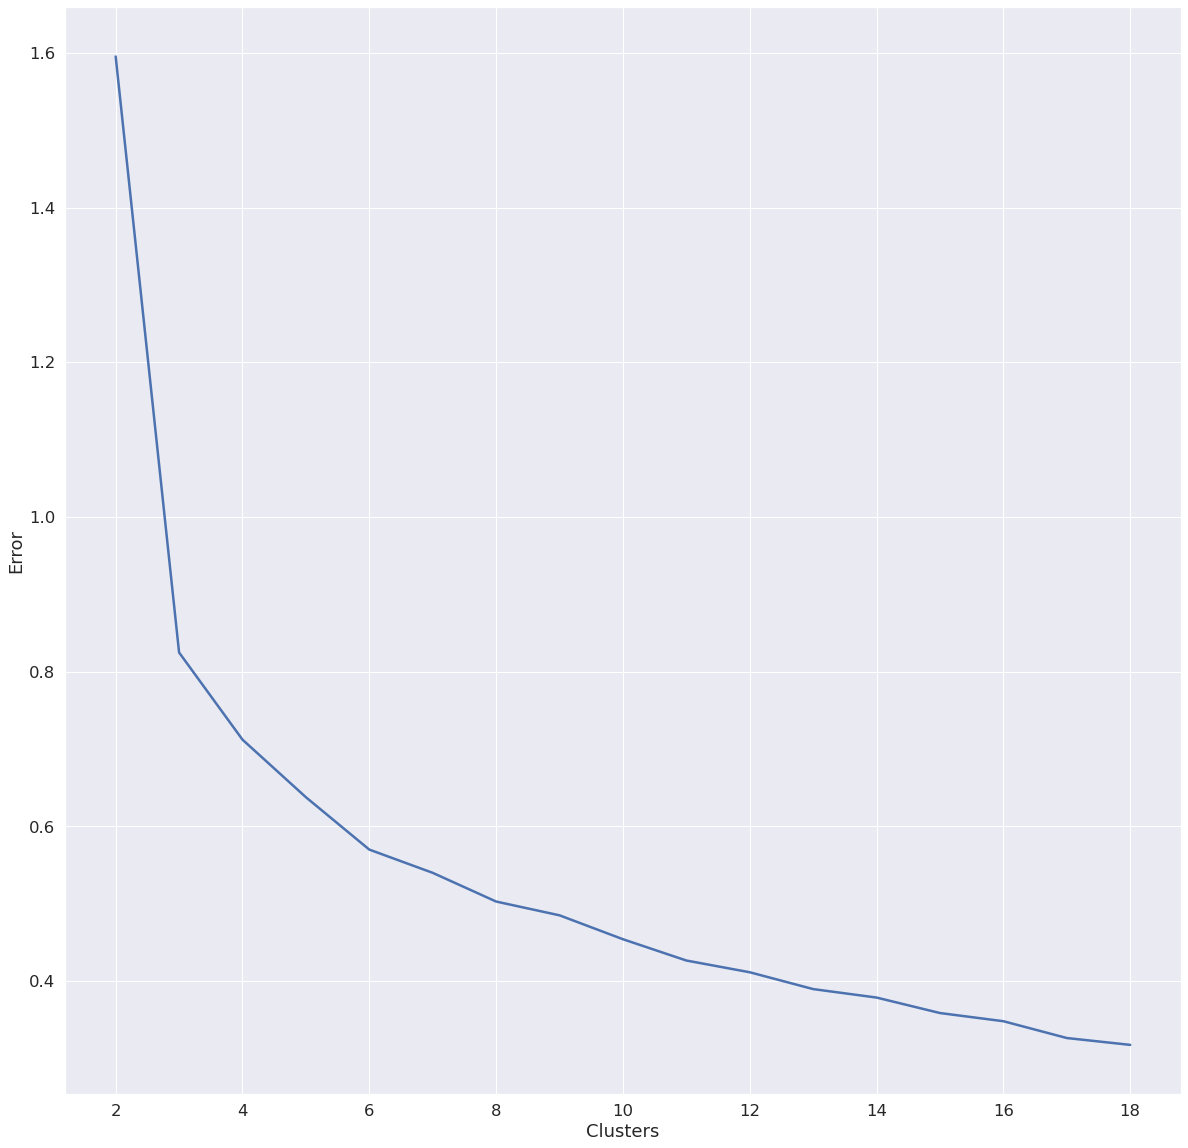

In [18]:
_ = _visualization.plot_cluster_errors(Ks,Js)

* It seems thare are too many columns, the number of clusters is almost the same of the number of samples

## Using a dendogram

We are using lastP as metric for the linkage method:

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

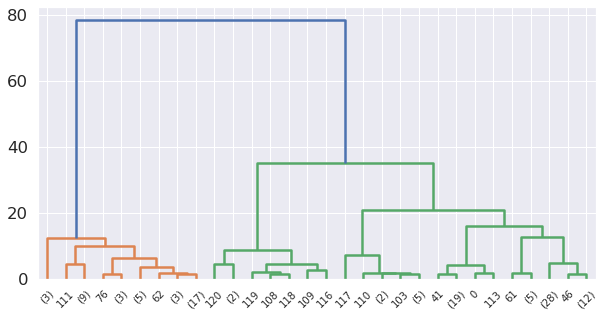

In [19]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(df_products_out)

In [20]:
clusters = _optimizer.fcluster_cut(df_products_out.values, max_d=2)
clusters.shape, len(np.unique(clusters))

((130,), 19)

In [21]:
df_products_out['hc_cluster'] = clusters

In [22]:
df_products_out[['kmeans_cluster', 'hc_cluster']].reset_index().groupby(['kmeans_cluster', 'hc_cluster']).count()

,,code
kmeans_cluster,hc_cluster,
0,17,6
1,14,1
2,13,9
3,19,13
4,18,28
5,8,1
6,15,20
7,16,2
8,7,2


/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

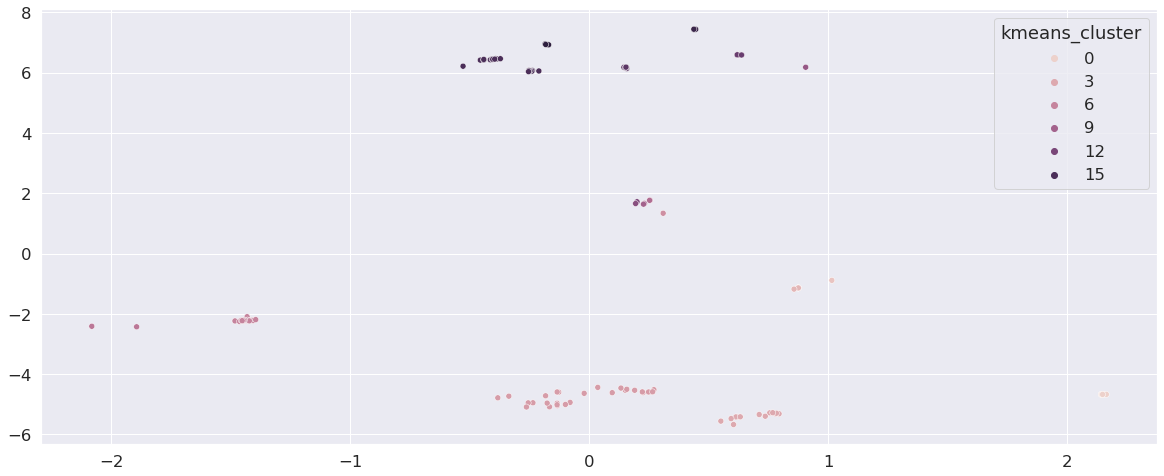

In [23]:
tsne_labels = _visualization.create_tsne_labels(df_products_out)
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['kmeans_cluster'])

/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

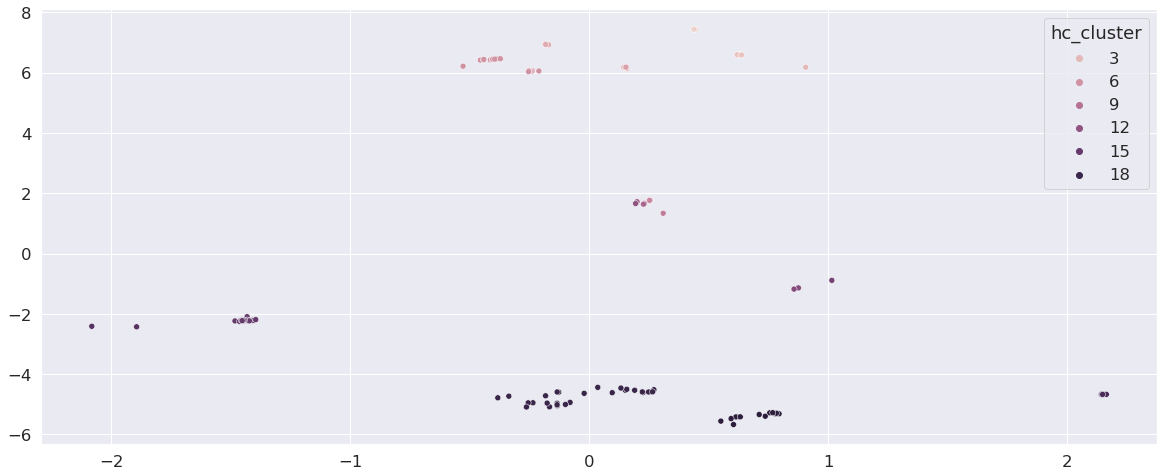

In [24]:
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['hc_cluster'])

In [25]:
_metrics.applyClusterMetrics(df_products_out,df_products_out.kmeans_cluster)

Davies Bouldin
0.3737577961061327

Calinski and Harabaz
1429.2619895897724

Silhouette Score
0.6210667761858844



In [26]:
_metrics.applyClusterMetrics(df_products_out,df_products_out.hc_cluster)

Davies Bouldin
0.3584203919937783

Calinski and Harabaz
1434.4175251186728

Silhouette Score
0.6141556747214849



In [27]:
df_products_out.drop(columns=['hc_cluster', 'kmeans_cluster']).to_csv('../data/products_features_exp5.csv')